In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 
from google.colab.patches import cv2_imshow

In [0]:
args = {
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/test_image_2.png'
}

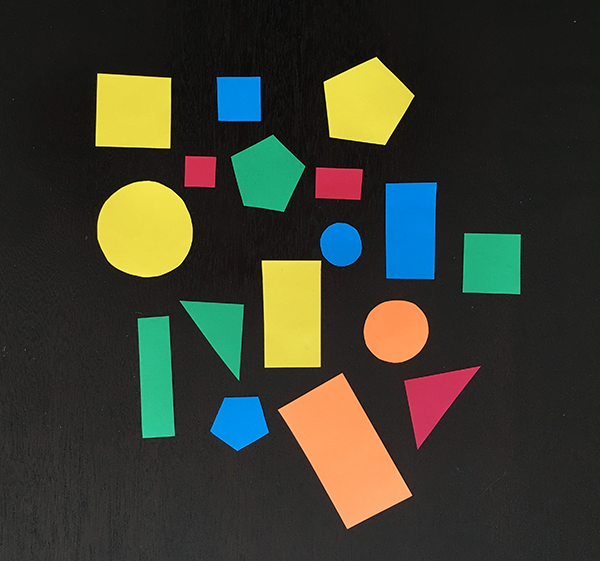

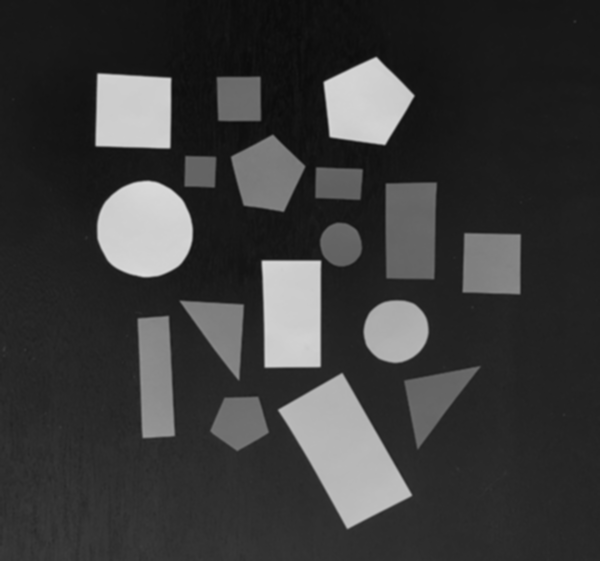

In [17]:
# Load the image :
img = cv2.imread(args["image"])
cv2_imshow(image)

# Convert image to grayscale
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur with size 5x5 (To reduce noise in next process)
blurred = cv2.GaussianBlur(imgGrey, (5,5), 0)


cv2_imshow(blurred)

Canny method is to detect the edge of in a picture

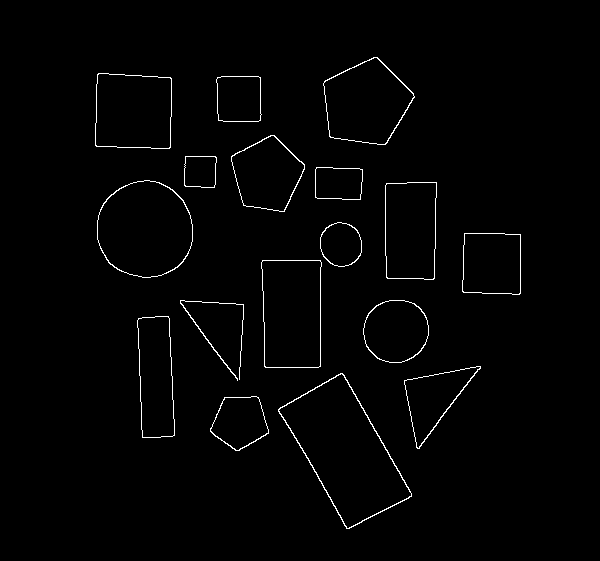

In [18]:
#Canny method is to detect the edge of in a picture
edged = cv2.Canny(blurred, 30, 150)
cv2_imshow(edged)

Then, we can find contour by using canny edge detection and draw it in original image 

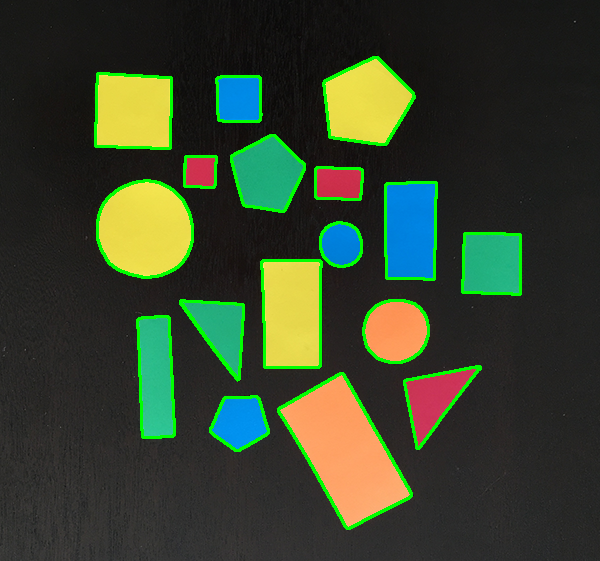

In [19]:
#Then, we can find contour by using canny edge detection and draw it in original image
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)
cv2_imshow(draw)

rectangle 1 has 134 Width and 156 height
rectangle 2 has 38 Width and 122 height
rectangle 3 has 59 Width and 107 height
square 1 has 59 Width and 62 height
rectangle 4 has 51 Width and 98 height
rectangle 5 has 48 Width and 33 height
square 2 has 33 Width and 32 height
square 3 has 44 Width and 44 height
square 4 has 77 Width and 76 height


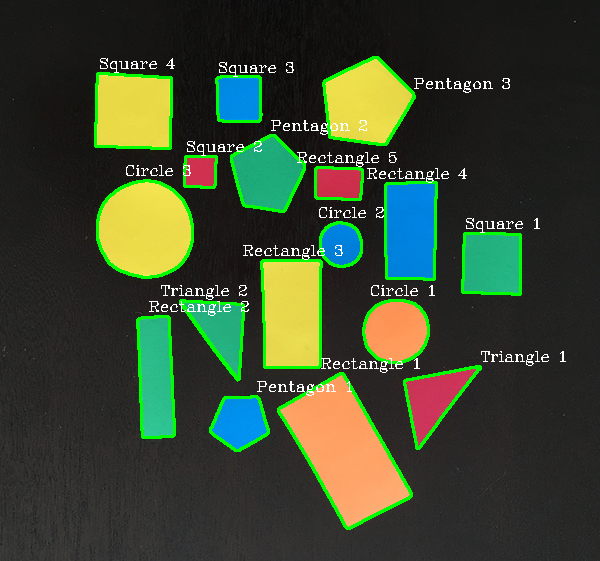

I count 2 Triangle, 4 Square, 5 Rectangle, 3 Pentagon, 0 star, 3 circle in this image with total of 17 shape


In [20]:
#initialise the shape count
triangle = 0
square = 0
rectangle = 0
pentagon = 0
circle = 0

for cnts in cnts:
    """
    approximates determine the vertices on a contour shape to another shape
    depending upon the precision we specify (this will use to determine shape)
    """
    approx = cv2.approxPolyDP(cnts, 0.02* cv2.arcLength(cnts, True), True)
    draw2 = cv2.drawContours(img.copy(), cnts, -1, (255,255,255), 2)
    #cv2_imshow(draw2)
    
    x = approx.ravel()[0] #just x-coordinate to put text later
    y = approx.ravel()[1] - 5 #just y-coordinate to put text later
    if len(approx) == 3: #3 vertices
        triangle += 1 #counting triangle
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Triangle {}".format(triangle), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 4:
    """
    4 vertices but to differentiate square and rectangle need to compare their width (w) and height (h)
    """
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05: # ratio of w and h
            square += 1 #counting square
            print("square {} has {} Width and {} height".format(square, w, h)) #show w and h
            # put text near the shape:
            # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
            cv2.putText(img, "Square {}".format(square), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
          
        else:
            rectangle += 1 #counting rectangle
            print("rectangle {} has {} Width and {} height".format(rectangle, w, h)) #show w and h
            # put text near the shape:
            # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
            cv2.putText(img, "Rectangle {}".format(rectangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
   
    elif len(approx) == 5: #5 vertices
        pentagon += 1 #counting pentagon
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Pentagon {}".format(pentagon), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 6:  #special case for this image 
        triangle += 1 
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Triangle {}".format(triangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    else: #others vertices will consider as circle
        circle +=1 #counting circle
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Circle {}".format(circle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

total = triangle + square + rectangle + pentagon + circle  #sum up all counted shape 

cv2_imshow(img)
print("There are {} Triangle, {} Square, {} Rectangle, {} Pentagon, {} circle in this image with total of {} shape".format(triangle,square,rectangle,pentagon,circle,total))


# Full Code W/O Commend

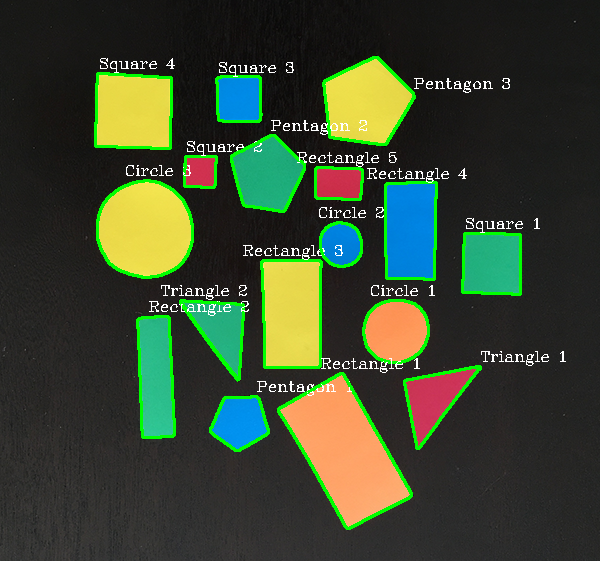

There are 2 Triangle, 4 Square, 5 Rectangle, 3 Pentagon, 0 star, 3 circle in this image with total of 17 shape


In [25]:
#clean code without commend and less output
img = cv2.imread(args["image"])

imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(imgGrey, (5,5), 0)

edged = cv2.Canny(blurred, 30, 150)


(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)


triangle = 0
square = 0
rectangle = 0
pentagon = 0
circle = 0
star = 0

for cnts in cnts:
    approx = cv2.approxPolyDP(cnts, 0.02* cv2.arcLength(cnts, True), True)
    draw = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)
    #cv2_imshow(draw)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        triangle += 1
        cv2.putText(img, "Triangle {}".format(triangle), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            square += 1
            cv2.putText(img, "Square {}".format(square), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
          
        else:
            rectangle += 1
            cv2.putText(img, "Rectangle {}".format(rectangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
   
    elif len(approx) == 5:
        pentagon += 1
        cv2.putText(img, "Pentagon {}".format(pentagon), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 10:
        star += 1
        cv2.putText(img, "Star {}".format(star), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 6:  #special case for this image
        triangle += 1
        cv2.putText(img, "Triangle {}".format(triangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    else:
        circle +=1
        cv2.putText(img, "Circle {}".format(circle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

total = triangle + square + rectangle + pentagon + star + circle   
cv2_imshow(img)     
print("There are {} Triangle, {} Square, {} Rectangle, {} Pentagon, {} star, {} circle in this image with total of {} shape".format(triangle,square,rectangle,pentagon,star,circle,total))
